**Data Exploration and Visualisation**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/original_netflix.csv')
df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
#unique counts in each column#
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
#sum of null values in each column#
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
##unnesting cast column
cast_1=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(cast_1, index = df['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Actors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.head(10)

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


In [ ]:
#un-nesting director column#
director_1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(director_1, index = df['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Directors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
##unesting country column
country_x=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(country_x, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Country'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.head(15)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


In [ ]:
##unnesting listed-in column
listed_c=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(listed_c, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Genre'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.head(5)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
##merging all the above dataframes x

df5 = df1.merge(df2,on=['title'],how='inner')
df6 = df5.merge(df4,on=['title'],how='inner')
df7 = df6.merge(df3,on=['title'],how='inner')
df7.head()


,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


In [ ]:
df7.shape

(201991, 5)

In [ ]:
##attaching above merged dataframe to original dataframe--df
df = df7.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df.shape

(201991, 11)

In [ ]:
##re-checking for missing values
df.isnull().sum()

title             0
Actors            0
Directors         0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [ ]:
##replacing nan values

df['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df['Country'].replace(['nan'],[np.nan],inplace=True)
df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
##duration and rating columns have interchanged values in the original dataset. fixing these per below code:

df.loc[df['duration'].isnull(),'duration'] = df.loc[df['duration'].isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min', na=False),'rating'] = 'NR'
df['rating'].fillna('NR',inplace=True)
df.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [ ]:
##filling missing values in date_added column
for i in df[df['date_added'].isnull()]['release_year'].unique():
    date = df[df['release_year'] == i]['date_added'].mode().values[0]
    df.loc[df['release_year'] == i,'date_added'] = df.loc[df['release_year']==i,'date_added'].fillna(date)


In [ ]:
##filling missing values in country column
for i in df[df['Country'].isnull()]['Directors'].unique():
    if i in df[~df['Country'].isnull()]['Directors'].unique():
        country = df[df['Directors'] == i]['Country'].mode().values[0]
        df.loc[df['Directors'] == i,'Country'] = df.loc[df['Directors'] == i,'Country'].fillna(country)

In [ ]:
for i in df[df['Country'].isnull()]['Actors'].unique():
    if i in df[~df['Country'].isnull()]['Actors'].unique():
        imp = df[df['Actors'] == i]['Country'].mode().values[0]
        df.loc[df['Actors'] == i,'Country'] = df.loc[df['Actors']==i,'Country'].fillna(imp)

In [ ]:
df['Country'].fillna('Unknown Country',inplace=True)
df.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [ ]:
##Analysis
df["date_added"] = pd.to_datetime(df['date_added'])
df ['duration'] = df['duration'].str.replace(" min","")
df.head(6)

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
df['duration2'] = df.duration.copy()
df_ = df.copy()
df_.loc[df_['duration2'].str.contains('Season'),'duration2'] = 0
df_['duration2'] = df_.duration2.astype('int')
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0


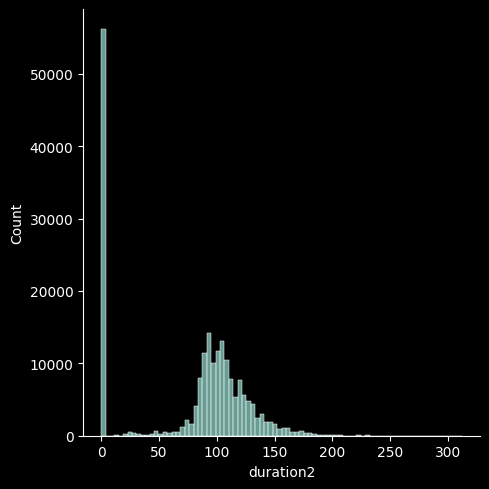

In [ ]:
##duration with 0 are tV shows and most of the movies are around 100 min duration
sns.displot(df_['duration2'])

plt.show()

In [ ]:
bins = [-1,1,50,80,100,120,150,200,315]
labels = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_['duration2'] = pd.cut(df_['duration2'],bins = bins, labels = labels )


In [ ]:
df_.loc[~df_['duration'].str.contains('Season'),'duration'] = df_.loc[~df_['duration'].str.contains('Season'),
'duration2']
df_.drop(['duration2'],axis=1,inplace=True)
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


In [ ]:
from datetime import datetime
from dateutil.parser import parse
df_["year_added"] = df_['date_added'].dt.year
df_["year_added"] = df_["year_added"].astype("Int64")
df_["month_added"] = df_['date_added'].dt.month
df_['month_name'] = df['date_added'].dt.month_name()
df_["month_added"] = df_["month_added"].astype("Int64")
df_["day_added"] = df_['date_added'].dt.day
df_["day_added"] = df_["day_added"].astype("Int64")
df_['Weekday_added'] = df_['date_added'].apply(lambda x: parse(str(x)).strftime("%A"))
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9,September,25,Saturday
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


In [ ]:
df_['title'] = df_['title'].str.replace(r"\(.*\)","")

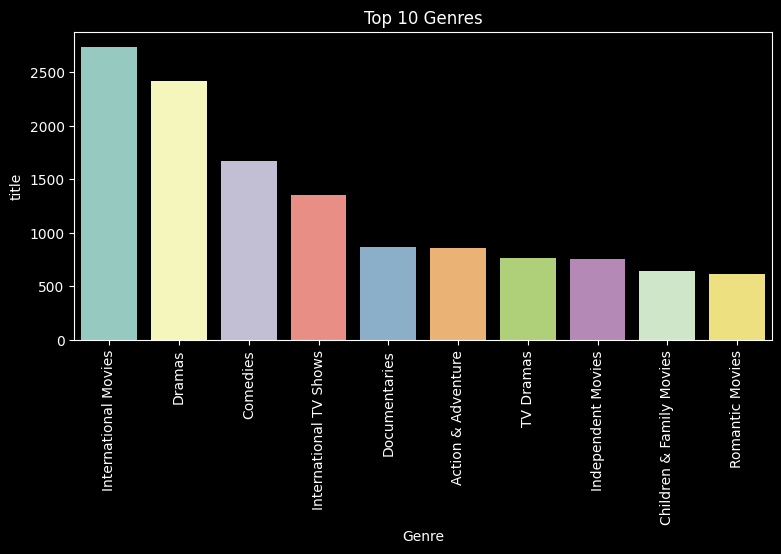

In [ ]:
##Top 3 Genres are International movies, Dramas and comedies
df_genre=df_.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(9,4))
sns.barplot(x = "Genre",y = 'title', data = df_genre)
plt.xticks(rotation = 90)
plt.title('Top 10 Genres')
plt.show()

In [ ]:
df_['Country'] = df_['Country'].str.replace(',', '')
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9,September,25,Saturday
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


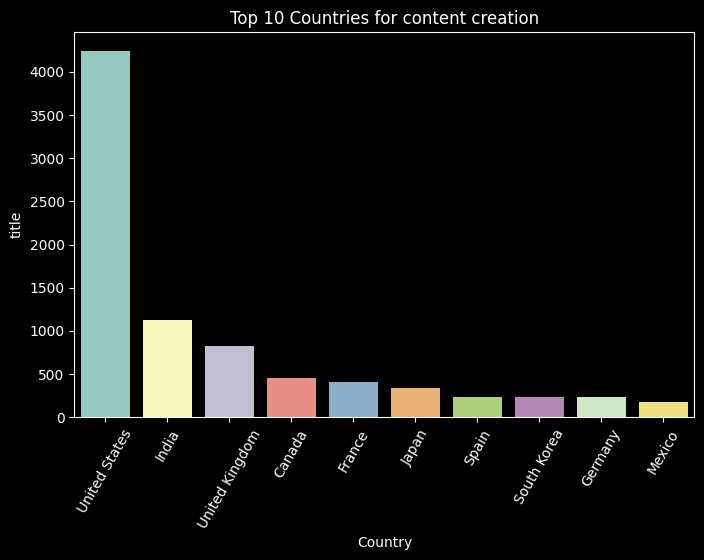

In [ ]:
##USA,India,UK are top countries for content creation
df_country = df_.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(8,5))
sns.barplot(y = "title",x = 'Country', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for content creation')
plt.show()

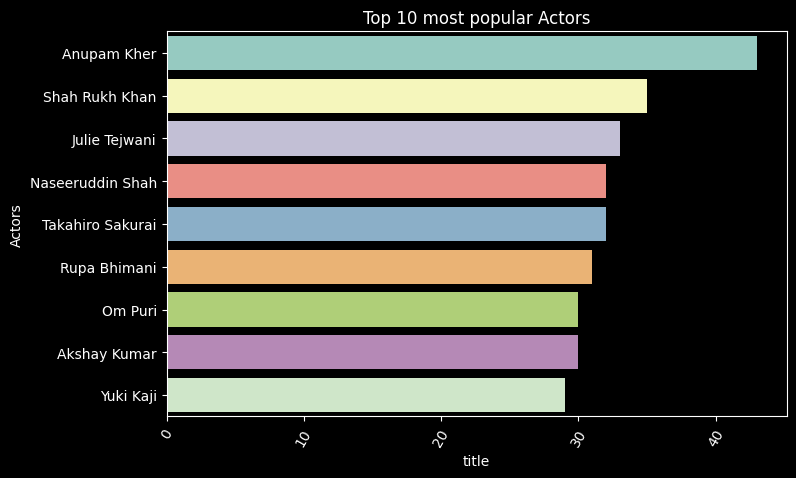

In [ ]:
##The most popular actors include Anupam Kher, ShahRukh Khan, Julie Tejwani.
df_actors = df_.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors = df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(8,5))
sns.barplot(y = "Actors",x = 'title', data = df_actors )
plt.xticks(rotation = 60)
plt.title('Top 10 most popular Actors')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

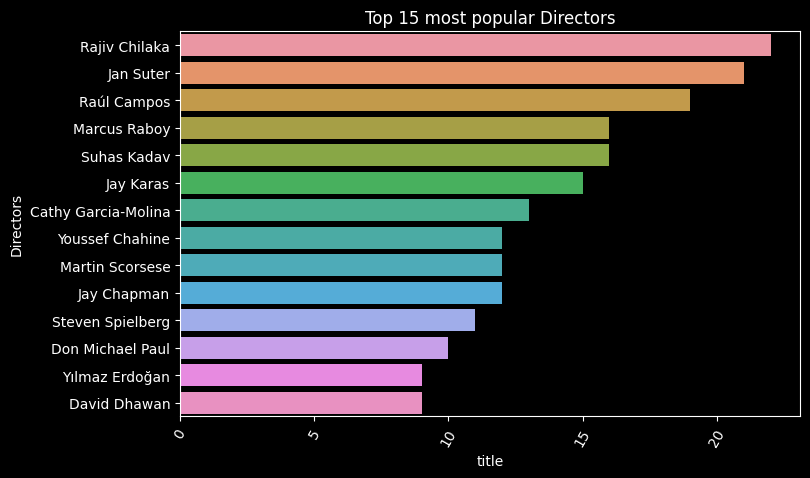

In [ ]:
##Top 15 popular Directors: Rajiv chilaka,Jan Suter, Raul Campos
df_directors = df_.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],
ascending=False)[:15]
df_directors = df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(8,5))
sns.barplot(y = "Directors",x = 'title', data = df_directors )
plt.xticks(rotation = 60)
plt.title('Top 15 most popular Directors')
plt.show

Text(0.5, 1.0, 'Movies and TV Shows added to Netflix by year ')

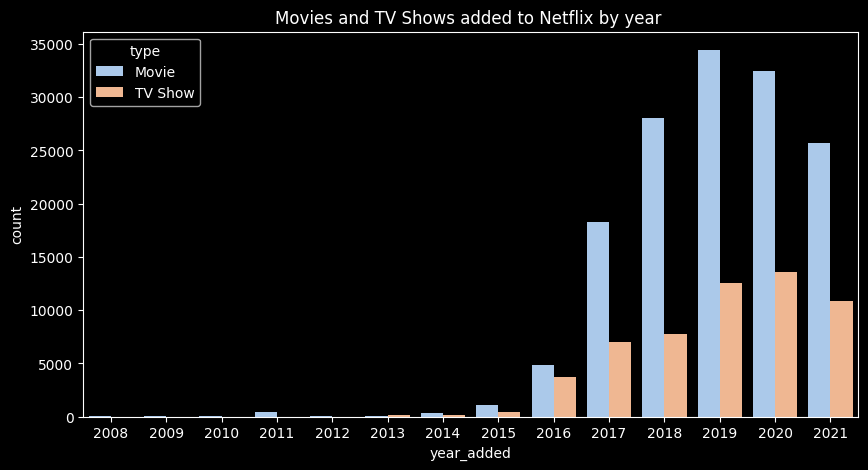

In [ ]:
##the number of movies and tvshows added increased from 2014 till 2019 and then declined
fig = plt.figure(figsize = (10,5))

plt.style.use('dark_background')
sns.countplot(data = df_,x = 'year_added',hue = 'type',palette ="pastel")
plt.title('Movies and TV Shows added to Netflix by year ', fontsize=12)

<function matplotlib.pyplot.show(close=None, block=None)>

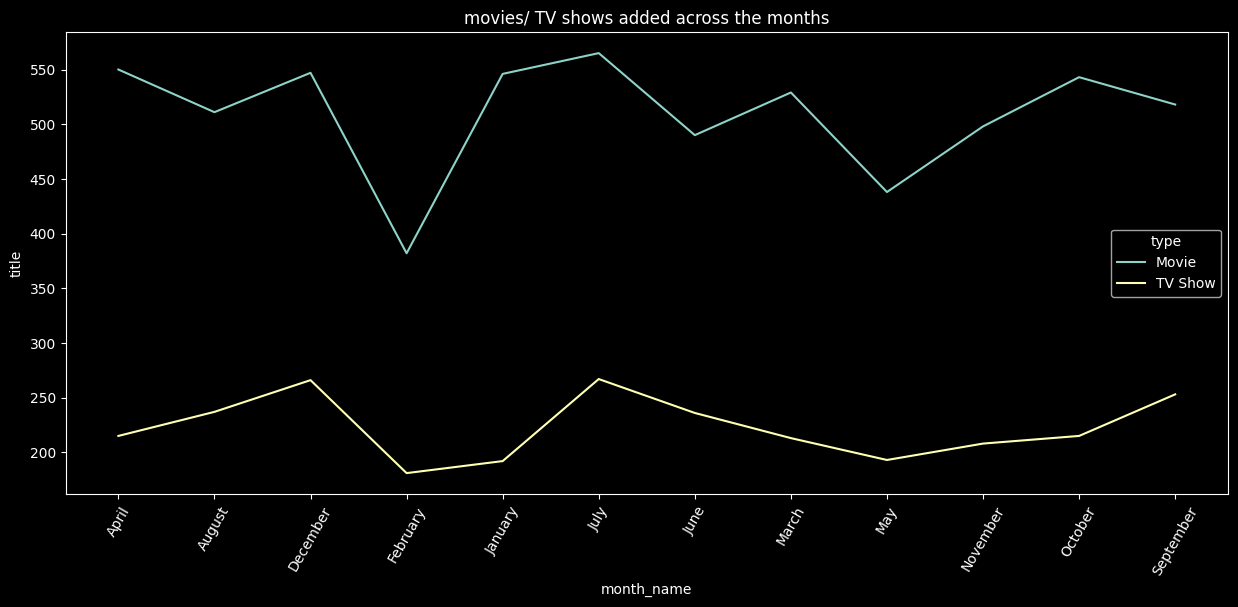

In [ ]:
##best launch month for movies and TV shows is july and also most of the content gets added in july followed by december
df_month = df_.groupby(['month_name', 'type']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(x = "month_name",y = 'title', data = df_month, color = 'red', hue = df_month.type )
plt.xticks(rotation = 60)
plt.title('movies/ TV shows added across the months')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

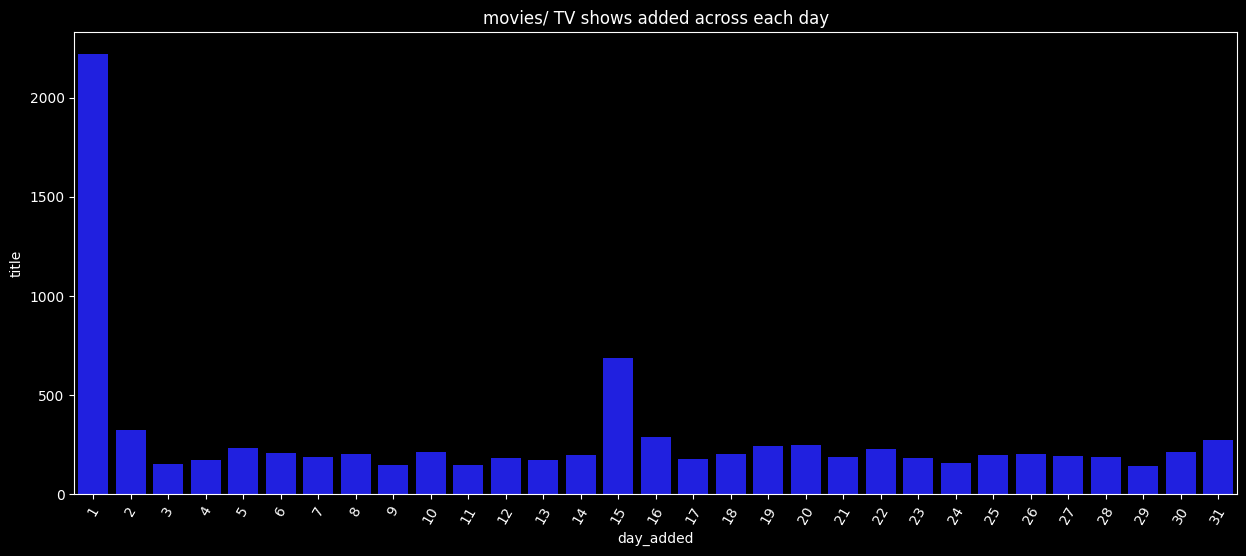

In [ ]:
##1st of each month is when the content gets added the most followed by 15th of the month
df_day = df_.groupby(['day_added']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(15,6))
sns.barplot(x = "day_added",y = 'title', data = df_day, color = 'blue' )
plt.xticks(rotation = 60)
plt.title('movies/ TV shows added across each day')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

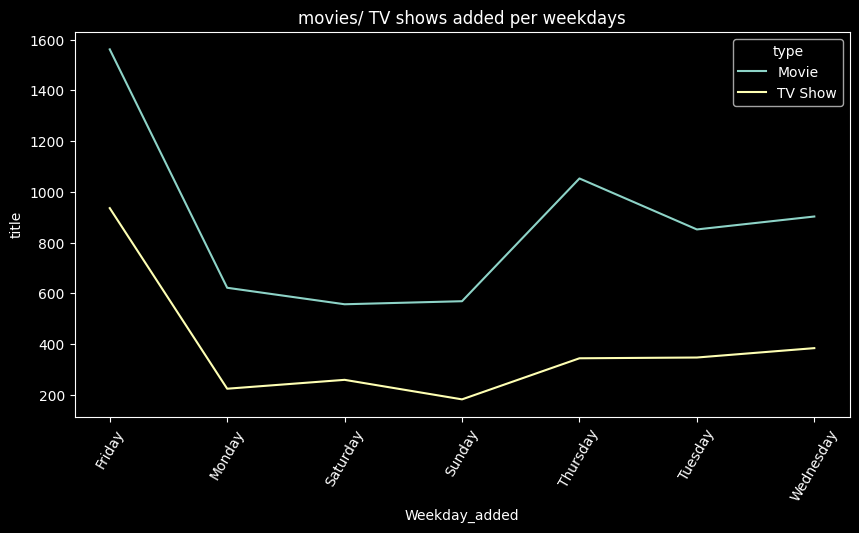

In [ ]:
##most of the content get added on Fridays
df_weekday = df_.groupby(['Weekday_added', 'type']).agg({'title':'nunique'}).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x = "Weekday_added",y = 'title', data = df_weekday, color = 'red' , hue = df_weekday.type)
plt.xticks(rotation = 60)
plt.title('movies/ TV shows added per weekdays')
plt.show

(2000.0, 2020.0)

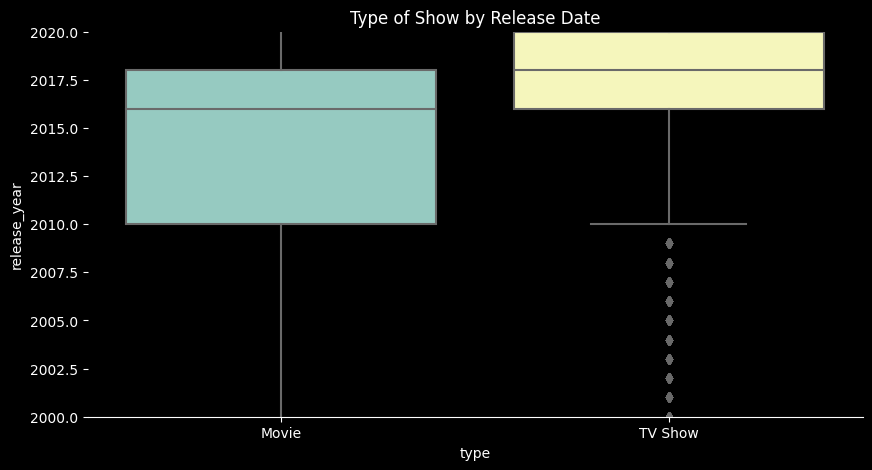

In [ ]:
##Tv shows have been releasing more in the recent years
plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='release_year', data=df_, )
sns.despine(left=True)
plt.title('Type of Show by Release Date')
plt.ylim(2000,2020)

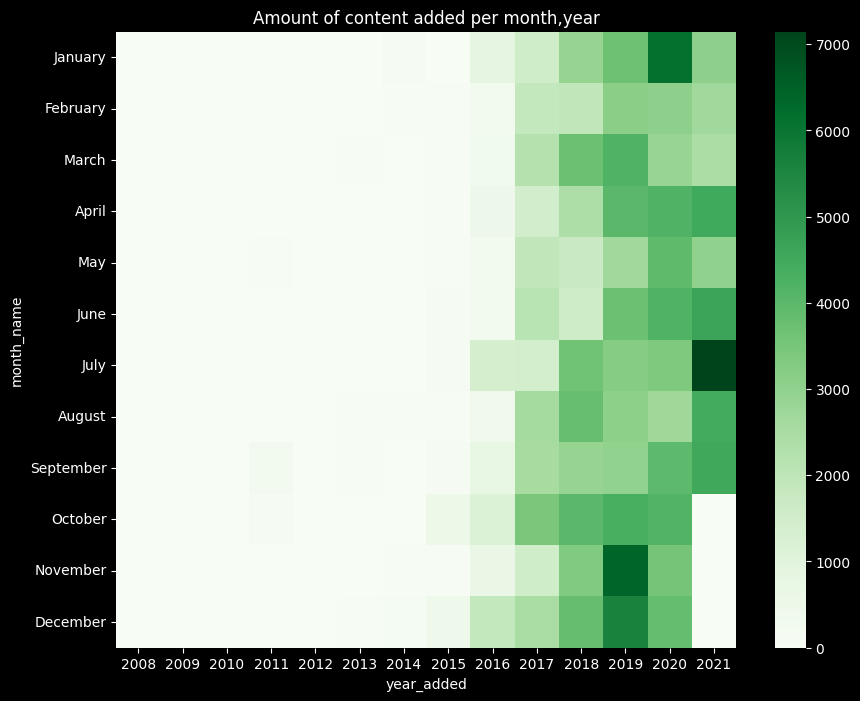

In [ ]:
##Most of the content was added in November, 2019 and July, 2021 followed by January 2020
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']
content = df_.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10,8))
plt.title("Amount of content added per month,year")
sns.heatmap(content , cmap = 'Greens')
plt.show()

Analysis for shows and movies separately

In [ ]:
df_shows = df_[df_['type']=='TV Show']
df_movies = df_[df_['type']=='Movie']

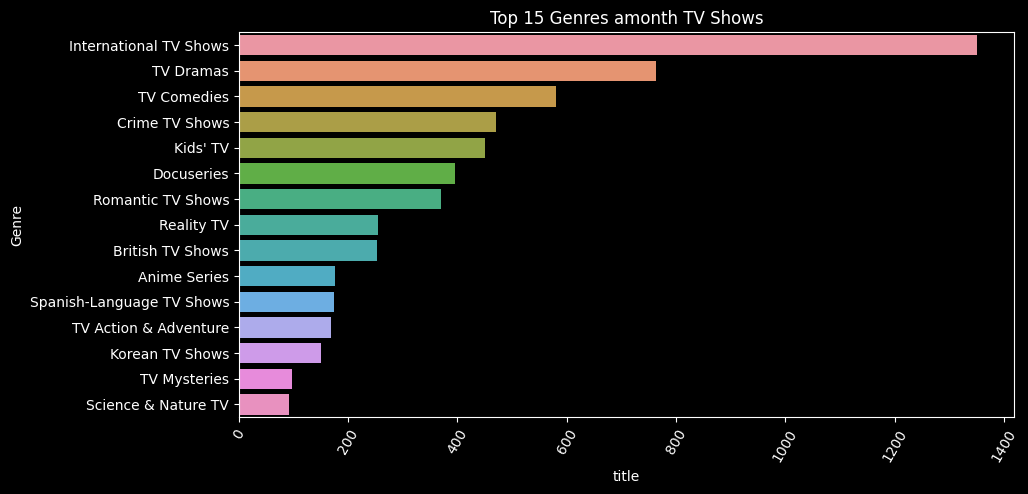

In [ ]:
##International TV Shows, Dramas and Comedy Genres are most popular among TV shows
df_genre = df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],
ascending=False)[:15]
plt.figure(figsize = (10,5))
sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.xticks(rotation = 60)
plt.title('Top 15 Genres amonth TV Shows')
plt.show()

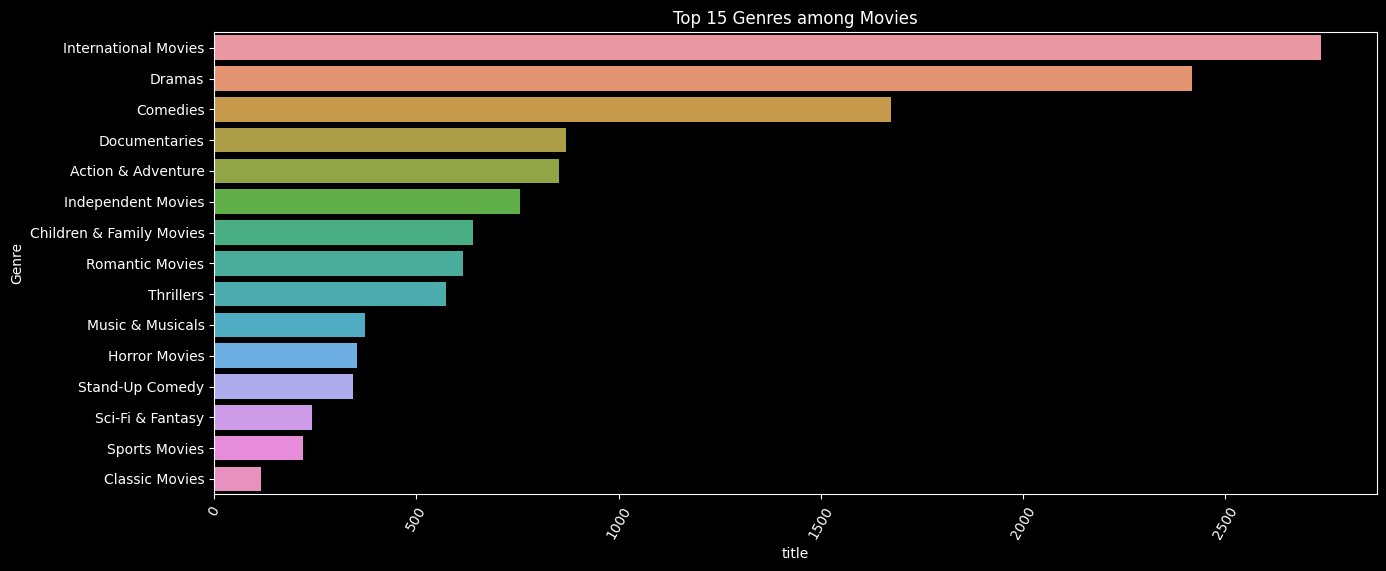

In [ ]:
##International TV Shows, Dramas and Comedy Genres are most popular among movies as well
df_genre = df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize = (15,6))
sns.barplot(y = "Genre",x = 'title', data = df_genre)
plt.xticks(rotation = 60)
plt.title('Top 15 Genres among Movies')
plt.show()

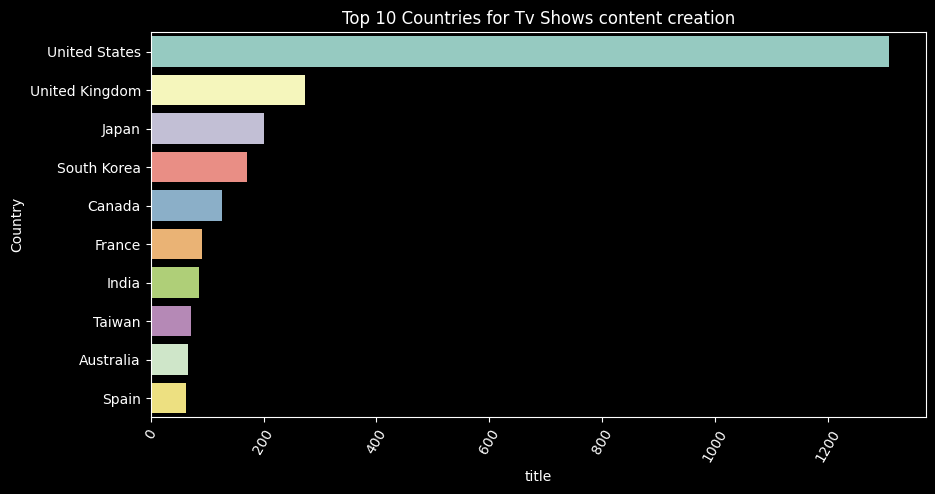

In [ ]:
df_country = df_shows.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for Tv Shows content creation')
plt.show()

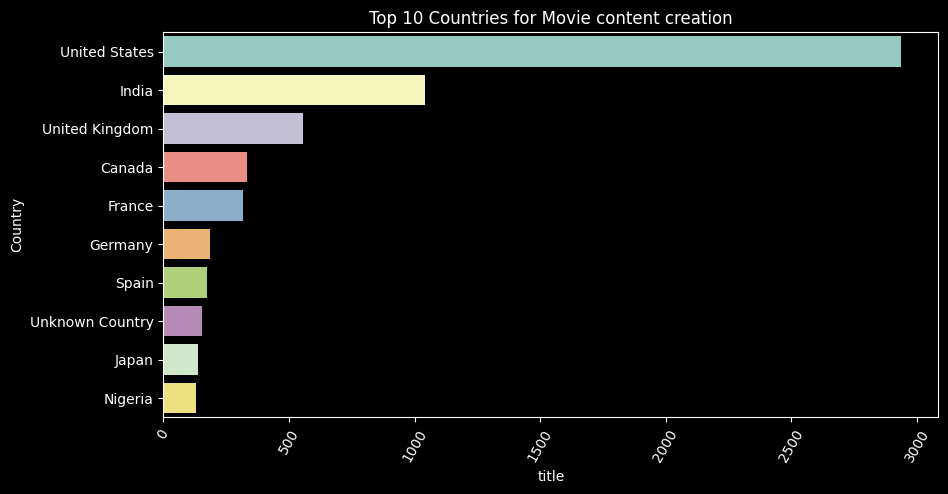

In [ ]:
df_country = df_movies.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(10,5))
sns.barplot(y = "Country",x = 'title', data = df_country)
plt.xticks(rotation = 60)
plt.title('Top 10 Countries for Movie content creation')
plt.show()

Business Insights

•	Top 3 Genres are International movies, Dramas and comedies

•	USA,India,UK are top countries for content creation

•	The most popular actors include Anupam Kher, ShahRukh Khan, Julie Tejwani.

•	Top 15 popular Directors: Rajiv chilaka,Jan Suter, Raul Campos

•	The number of movies and tvshows added increased from 2014 till 2019 and then declined

•	Best launch month for movies and TV shows is july and also most of the content gets added in july followed by December

•	1st of each month is when the content gets added the most followed by 15th of the month

•	Most of the content get added on Fridays

•	Tv shows have been releasing more in the recent years

•	Most of the content was added in November, 2019 and July, 2021 followed by January 2020

•	International content, Dramas and Comedy Genres are most popular among both TV shows and movies

•	USA is the top country for content creation followed by UK and Japan for TV shows

•	USA is the top country for content creation followed by India and UK for Movies





Recommendations


*  The content can be added in JULY month
*  The most popular Genres are International tv/movies, Dramas and Comedy. Hence, highly recommend to generate content in the Genres
*  Best weekday to release content is on Friday's
*  While creating content, consider most popular actors, directors and their combinations to achieve higher ratings






